In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR

In [3]:
ds=pd.read_csv('nba.games.stats.csv')

In [4]:
ds.isnull().sum()

Unnamed: 0                  0
Team                        0
Game                        0
Date                        0
Home                        0
Opponent                    0
WINorLOSS                   0
TeamPoints                  0
OpponentPoints              0
FieldGoals                  0
FieldGoalsAttempted         0
FieldGoals.                 0
X3PointShots                0
X3PointShotsAttempted       0
X3PointShots.               0
FreeThrows                  0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoals              0
Opp.FieldGoalsAttempted     0
Opp.FieldGoals.             0
Opp.3PointShots             0
Opp.3PointShotsAttempted    0
Opp.3PointShots.            0
Opp.FreeThrows              0
Opp.FreeThrowsAttempted     0
Opp.FreeTh

In [5]:
len(ds)

9840

In [6]:
ds.size

403440

In [7]:
ds.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,10/29/2014,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,11/1/2014,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,11/5/2014,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,11/7/2014,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,11/8/2014,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                9840 non-null   int64  
 1   Team                      9840 non-null   object 
 2   Game                      9840 non-null   int64  
 3   Date                      9840 non-null   object 
 4   Home                      9840 non-null   object 
 5   Opponent                  9840 non-null   object 
 6   WINorLOSS                 9840 non-null   object 
 7   TeamPoints                9840 non-null   int64  
 8   OpponentPoints            9840 non-null   int64  
 9   FieldGoals                9840 non-null   int64  
 10  FieldGoalsAttempted       9840 non-null   int64  
 11  FieldGoals.               9840 non-null   float64
 12  X3PointShots              9840 non-null   int64  
 13  X3PointShotsAttempted     9840 non-null   int64  
 14  X3PointS

In [9]:
ds['Opp.totalscore']=ds[['OpponentPoints','Opp.FieldGoals','Opp.3PointShots','Opp.FreeThrows',
                           'Opp.TotalRebounds','Opp.Assists','Opp.Blocks','Turnovers','TotalFouls']].sum(axis=1)

In [35]:
X=ds[['TeamPoints','FieldGoals','X3PointShots','FreeThrows','TotalRebounds',
      'Assists','Steals','Blocks','Opp.Turnovers','Opp.TotalFouls',]]

In [36]:
y=ds[['OpponentPoints']]

In [37]:
X.head()

,TeamPoints,FieldGoals,X3PointShots,FreeThrows,TotalRebounds,Assists,Steals,Blocks,Opp.Turnovers,Opp.TotalFouls
0,102,40,13,9,42,26,6,8,9,22
1,102,35,7,25,37,26,10,6,18,26
2,92,38,8,8,37,26,14,5,19,15
3,119,43,13,20,38,28,8,3,19,30
4,103,33,9,28,41,18,10,5,15,29


In [38]:
y.head()

,OpponentPoints
0,109
1,92
2,94
3,122
4,96


# Linear Regression

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=0)

In [92]:
#training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [93]:
#y_pred for predicting 
y_pred=regressor.predict(X_test)

## LR 80/20 Prediction

In [94]:
X.head()

,TeamPoints,FieldGoals,X3PointShots,FreeThrows,TotalRebounds,Assists,Steals,Blocks,Opp.Turnovers,Opp.TotalFouls
0,102,40,13,9,42,26,6,8,9,22
1,102,35,7,25,37,26,10,6,18,26
2,92,38,8,8,37,26,14,5,19,15
3,119,43,13,20,38,28,8,3,19,30
4,103,33,9,28,41,18,10,5,15,29


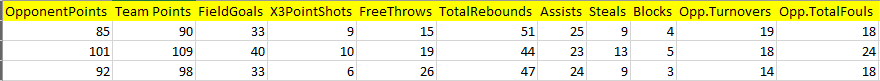

In [95]:
#Opponents Points are not taking in the prediction data
#Opponents points are only in the picture to get a quick comparison. W or L results are in validation dataset
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([[88.1445249]])

In [96]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([[103.1835874]])

In [97]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([[99.0898374]])

In [98]:
from sklearn.metrics import r2_score
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.3032244947052479


In [99]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 10.200245285904998


# DTR

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [101]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [102]:
y_pred=regressor.predict(X_test)

## DTR 80/20 Prediction

In [103]:
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([95.])

In [104]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([112.])

In [105]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([106.])

In [106]:
from sklearn.metrics import r2_score
print('R-Square',r2_score(y_test,y_pred))

R-Square -0.45760550007941014


In [107]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 14.753130265888538


# Logistic Regression

#### Below we are testing Logistic Regression only to see the predicitions due to its advantage in yes/no answers it probably will not be as effective with this type of data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Connor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Logistic Regression 80/20 prediction

In [78]:
print(classifier.predict(sc.transform([[90,33,9,15,51,25,9,4,19,18]])))

[88]


In [79]:
print(classifier.predict(sc.transform([[109,40,10,19,44,23,13,5,18,24]])))

[101]


In [80]:
print(classifier.predict(sc.transform([[98,33,6,26,47,24,9,3,14,18]])))

[100]


In [90]:
accuracy_score(y_test,y_pred)

0.033028455284552845

# RFT

In [121]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-121-40255d4da7b6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [122]:
y_pred=regressor.predict(X_test)

## RFT 80/20 Prediction

In [123]:
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([85.05])

In [124]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([101.35])

In [125]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([93.85])

In [126]:
from sklearn.metrics import r2_score
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.8819922662339343


In [127]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 4.197777477064646


## Since we have completed all 80/20 Predictions for: Linear R, DTR, Logistic R, and RFT, we see that RFT is the best and Linear R is second best so we will continue with other split predictions with those two.

## First: Linear Regression

# 80 / 20

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=20)

In [129]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [130]:
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([[87.49742759]])

In [131]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([[103.20836509]])

In [132]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([[98.10680259]])

# 70/30

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.70,random_state=15)

In [134]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [135]:
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([[88.80556614]])

In [136]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([[102.69033177]])

In [137]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([[99.42275364]])

# Square Root 70/30 Split

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.70,random_state=15)

In [139]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [142]:
np.sqrt(regressor.predict([[90,33,9,15,51,25,9,4,19,18]]))

array([[9.42367052]])

In [143]:
np.sqrt(regressor.predict([[109,40,10,19,44,23,13,5,18,24]]))

array([[10.13362382]])

In [144]:
np.sqrt(regressor.predict([[98,33,6,26,47,24,9,3,14,18]]))

array([[9.97109591]])

# Square Root 80/20 Split

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=20)

In [146]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [147]:
np.sqrt(regressor.predict([[90,33,9,15,51,25,9,4,19,18]]))

array([[9.35400596]])

In [148]:
np.sqrt(regressor.predict([[109,40,10,19,44,23,13,5,18,24]]))

array([[10.15915179]])

In [149]:
np.sqrt(regressor.predict([[98,33,6,26,47,24,9,3,14,18]]))

array([[9.90488781]])

# Second: RFT

# 80 / 20

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [151]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-151-93d3aab45076>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [153]:
y_pred=regressor.predict(X_test)

In [154]:
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([85.05])

In [155]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([101.35])

In [156]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([93.85])

# 70/30

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 30)

In [158]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-158-93d3aab45076>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [160]:
y_pred=regressor.predict(X_test)

In [161]:
regressor.predict([[90,33,9,15,51,25,9,4,19,18]])

array([85.05])

In [162]:
regressor.predict([[109,40,10,19,44,23,13,5,18,24]])

array([101.35])

In [163]:
regressor.predict([[98,33,6,26,47,24,9,3,14,18]])

array([93.85])

# Square Root 70/30 Split

In [164]:
np.sqrt(regressor.predict([[90,33,9,15,51,25,9,4,19,18]]))

array([9.22225569])

In [165]:
np.sqrt(regressor.predict([[109,40,10,19,44,23,13,5,18,24]]))

array([10.06727371])

In [166]:
np.sqrt(regressor.predict([[98,33,6,26,47,24,9,3,14,18]]))

array([9.68762097])

# Square Root 80/20 Split

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=20)

In [173]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [174]:
np.sqrt(regressor.predict([[90,33,9,15,51,25,9,4,19,18]]))

array([[9.35400596]])

In [175]:
np.sqrt(regressor.predict([[109,40,10,19,44,23,13,5,18,24]]))

array([[10.15915179]])

In [176]:
np.sqrt(regressor.predict([[98,33,6,26,47,24,9,3,14,18]]))

array([[9.90488781]])